<h2><strong>1. </strong> Imports</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from numpy.linalg import eig
import scipy
import math
from numpy.linalg import det
from scipy.stats import multivariate_normal
from matplotlib import cm

<h2><strong>2. </strong> Génération d'une variable gaussienne aléatoire </h2>

In [2]:
#Definissons notre moyenne et la variance :
mu = 3
sigma2 = 4
N = 100

def gaus(N, mu, sigma2):
    return mu + np.sqrt(sigma2) * np.random.randn(N)
gaus100 = gaus(N,mu,sigma2)

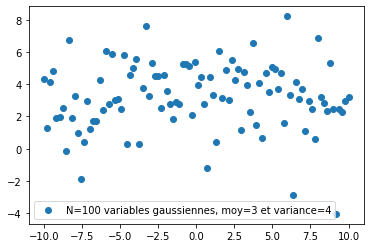

In [3]:
#Affichons les gaussiennes:
L = np.linspace(-10,10,len(gaus100))
plt.scatter(L, gaus100, label='N=100 variables gaussiennes, moy=3 et variance=4')
plt.legend()
plt.show()

In [4]:
#Calculons la moyenne empirique, la variance empirique:
def moyEmp(L):
    return np.sum(L)/len(L)

def varEmp(L):
    moy = moyEmp(L)
    tmp = 0
    for i in range(len(L)):
        tmp+=(L[i]-moy)**2
    return tmp/len(L)

#Affichons les résultats pour N=100 toujours :
print('la moyenne pour N=100 est de '+'{0:.3g}'.format(moyEmp(gaus100))+' et la variance est de '+'{0:.3g}'.format(varEmp(gaus100)))

la moyenne pour N=100 est de 3.24 et la variance est de 4.28


On voit que les résultats concordent, avec $\mu_{emp} = 3.36 \approx \mu$ et $\sigma_{emp} = 4.06 \approx \sigma$

la moyenne pour N=1000 est de 2.99 et la variance est de 4.26


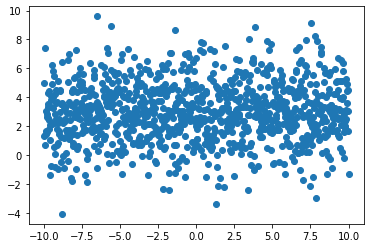

In [5]:
#Augmentons maintenant N pour voir le comportement de la gaussienne pour plus de variables:
gaus1000  = gaus(1000,mu,sigma2)
plt.scatter(np.linspace(-10,10,1000), gaus1000, label='N=100 variables gaussiennes, moy=3 et variance=4')
print('la moyenne pour N=1000 est de '+'{0:.3g}'.format(moyEmp(gaus1000))+' et la variance est de '+'{0:.3g}'.format(varEmp(gaus1000)))

la moyenne pour N=10000 est de 2.99 et la variance est de 4.02


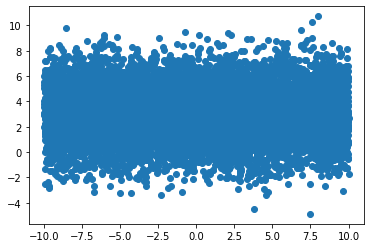

In [6]:
gaus10000 = gaus(10000,mu,sigma2)
plt.scatter(np.linspace(-10,10,10000), gaus10000, label='N=100 variables gaussiennes, moy=3 et variance=4')
print('la moyenne pour N=10000 est de '+'{0:.3g}'.format(moyEmp(gaus10000))+' et la variance est de '+'{0:.3g}'.format(varEmp(gaus10000)))

Par le théorème Central-Limite, on sait que l'on converge de plus en plus (presque-sûrement) vers une gaussienne parfaite de moyenne mu et de variance sigma2, c'est à dire qu'on constate bien la convergence de la moyene empirique vers la moyenne (pour n = 10000, $2.99 \approx \mu$ et $3.9 \approx \sigma$ )

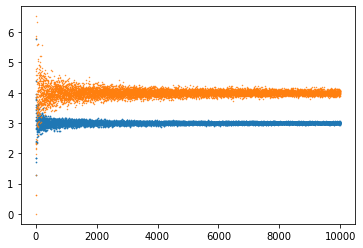

In [7]:
#On peut afficher l'évolution des deux valeurs en fonction de n:
Lmoy,Lsigma2 = [], []
for i in range(1,10001):
    gaustmp = gaus(i,mu,sigma2)
    Lmoy.append(moyEmp(gaustmp))
    Lsigma2.append(varEmp(gaustmp))
linspace10000 = np.linspace(0,10000,10000)
plt.scatter(linspace10000, Lmoy, s= 0.5, label = 'Evolution de la moyenne empirique en fonction de N')
plt.scatter(linspace10000, Lsigma2,s= 0.2, label = 'Evolution de la variance empirique en fonction de N')

On constate clairement la convergence vers $\mu = 3$ $\sigma = 4$

<h2><strong>3. </strong> Génération de vecteurs gaussiens aléatoires </h2>

<h4><strong>3.A </strong> Moyenne [4,9], matrice de covariance égale à l'identité </h4>

In [8]:
#Cette partie se passe en deux dimensions. 
N = 1000
vecMoy = np.array([[4],[9]])
vecGaus = vecMoy + np.random.randn(2,N)

<h4><strong>3.B </strong> Moyenne [4,9], matrice de covariance différente de l'identité </h4>

In [10]:
vecCov = np.array([[1,0],[0,np.sqrt(6)]]) 
vecGaus2 = vecMoy + vecCov @ np.random.randn(2,N)

#On notera que comme la covariance proposée est diagonale, la racine de la matrice est une matrice 
#diagonale dont les coefficients sont les racines des coefficients diagonaux de la précédente.

In [11]:
#Affichons les résultats :
print('Notre vecteur gaussien aléatoire a pour moyenne :')
print(np.mean(vecGaus2,axis=1))

Notre vecteur gaussien aléatoire a pour moyenne :
[3.94384112 8.90033995]


In [12]:
print('Notre vecteur gaussien aléatoire a pour matrice de covariance :')
print(np.cov(vecGaus2))

Notre vecteur gaussien aléatoire a pour matrice de covariance :
[[ 1.022233   -0.10525396]
 [-0.10525396  6.31312869]]


On obtient un vecteur moyenne satisfaisait (proche de [4,9]) et une covariance également satisfaisante (proche de diag(1,6))

<h4><strong>3.C </strong> Cas général de passage à une matrice centrée de variance identité à une matrice centrée de variance quelconque </h4>

Il suffit de prendre $U=\sqrt{\Sigma}$, comme celle que l'on a utilisée plus haut. </br>

En effet, $cov(X^{'}) = cov(UX) = cov(\sqrt{\Sigma}X) = \sqrt{\Sigma}^T cov(X) \sqrt{\Sigma} = \Sigma$

La seule différence est que tout à l'heure notre variance était diagonale, donc la racine était simple à calculer. Dans le cas général, voici comme on fait :

In [13]:
#Pour calculer la matrice on utilisera np.sqrtm(M). Ci-dessous l'application directe:

<h4><strong>3.D </strong> Application (Cas général de passage à une matrice centrée de variance identité à une matrice centrée de variance quelconque)</h4>

In [14]:
cov3 = np.array([[2,2],[2,5]])
vecGaus3 = sqrtm(cov3) @ np.random.randn(2,N)

In [15]:
#Affichons nos résultats:
print('Notre vecteur gaussien aléatoire a pour moyenne :')
print(np.mean(vecGaus3,axis=1))

Notre vecteur gaussien aléatoire a pour moyenne :
[ 0.00416689 -0.01403273]


In [16]:
print('Notre vecteur gaussien aléatoire a pour matrice de covariance :')
print(np.cov(vecGaus3))

Notre vecteur gaussien aléatoire a pour matrice de covariance :
[[1.99242464 2.0974089 ]
 [2.0974089  5.23087103]]


CF diapo du cours sur l'ellipse de Mahalanobis, basiquement c'est le lieu des points $(U-M)^T \Sigma ^{-1} (U-M) = Cte$
</br> Nous calculons ici alpha qui représente son orientation, l'angle que fait son grand-axe avec l'axe des abscisses, qui résoud l'équation :
</br>
$tg(2 \alpha ) = \dfrac{2 s_{12}}{s_{11}-s_{12}}$

In [17]:
oriMaha=np.arctan(2*cov3[0][1]/((cov3)[0][0]-(cov3)[1][1]))/2
print("L'orientation de l'ellipse de Mahalanobis vaut :")
print(oriMaha)

L'orientation de l'ellipse de Mahalanobis vaut :
-0.4636476090008061


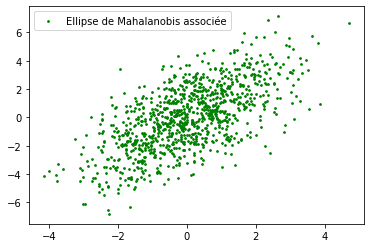

In [18]:
plt.scatter(vecGaus3[0], vecGaus3[1], s = 3, c = 'green', label = 'Ellipse de Mahalanobis associée')
plt.legend()
plt.show()

On va donc vérifier avec la formule proposée $LATEX VOIR TP$. Pour calculer la matrice des vecteurs propres, on utilise le module linalg :

In [19]:
valp, vecp = np.linalg.eig(cov3)
#valp contient les valeurs propres de s = cov3, et vecp ses vecteurs propres, en colonne. 

print(cov3)

[[2 2]
 [2 5]]


In [20]:
#On calcule d'abord la diagonalisée, c'est à dire simplement la matrice diagonale des valeurs propres :
diagVecp = np.diag([valp[0],valp[1]])
print(vecp @ diagVecp @ vecp.transpose())

[[2. 2.]
 [2. 5.]]


<h4><strong>3.E </strong> Génération de trois vecteurs gaussiens prédéfinis </h4>

Comme écrit dans l'énoncé on va générer des vecteurs gaussiens dans les matrices $X_i$ avec les moyennes suivantes : </br>
$m_1 = [4,9]$ et $s_1 = \begin{bmatrix} 2 & 2\\ 2 & 5 \end{bmatrix}$

In [21]:
m1 = np.array([[4],[9]])
s1 = np.array([[2,2],[2,5]])
X1 = m1 + sqrtm(s1) @ np.random.randn(2,N)

print(X1[0][0]) #Exemple de l'une des variables

2.5382363828102426


$m_2 = [8.5 ,7.5]$ et $s_2 = \begin{bmatrix} 2 & -2\\ -2 & 5 \end{bmatrix}$

In [22]:
m2 = np.array([[8.5],[7.5]])
s2 = np.array([[2,-2],[-2,5]])
X2 = m2 + sqrtm(s2) @ np.random.randn(2,N)

print(X2[0][0]) #Exemple de l'une des variables

8.273143498254274


$m_3 = [6 ,3.5]$ et $s_2 = \begin{bmatrix} 7 & -4\\ -4 & 7 \end{bmatrix}$

In [23]:
m3 = np.array([[6],[3.5]])
s3 = np.array([[7,-4],[-4,7]])
X3 = m3 + sqrtm(s3) @ np.random.randn(2,N)

print(X3[0][0]) #Exemple de l'une des variables

3.0389021312691193


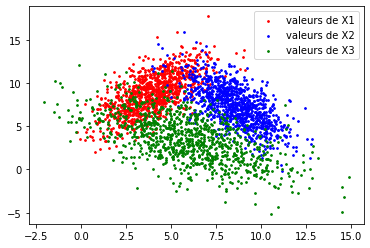

In [24]:
#Affichons l'ensemble des échantillons:
plt.scatter(X1[0], X1[1], s = 3, c = 'red', label = 'valeurs de X1')
plt.scatter(X2[0], X2[1], s = 3, c = 'blue', label = 'valeurs de X2')
plt.scatter(X3[0], X3[1], s = 3, c = 'green', label = 'valeurs de X3')
plt.legend()
plt.show()

<h2><strong>4. </strong> Courbes d'équidensité </h2>

<h4><strong>4.A </strong> Génération d'une grille </h4>

In [25]:
absc, ordo = np.linspace(0.27, 12.5, 57), np.linspace(-2, 15, 57)
grid1, grid2 = np.meshgrid(absc, ordo)
grid = np.dstack((grid1,grid2))

#Ces valeurs ont été choisies pour pouvoir représenter dans notre graphique le plus de points possibles.

<h4><strong>4.B </strong> Densités </h4>

In [26]:
m1flat = [4,9] #For some reason the scipy multivariate function doesn't work with an ndarray
multi_normal1 = multivariate_normal(m1flat, s1)
dens1 = multi_normal1.pdf(grid)

In [27]:
#dens1 is our density matrix. For instance, we can show the whole matrix, 
dens1

array([[2.99605728e-07, 2.59993923e-07, 2.16827682e-07, ...,
        2.81560028e-35, 2.85667014e-36, 2.78540042e-37],
       [6.15701866e-07, 5.46237044e-07, 4.65725774e-07, ...,
        1.90836499e-34, 1.97946639e-35, 1.97320981e-36],
       [1.22701518e-06, 1.11290530e-06, 9.70074142e-07, ...,
        1.25432764e-33, 1.33013364e-34, 1.35555769e-35],
       ...,
       [1.89685445e-09, 5.42896669e-09, 1.49327155e-08, ...,
        1.72838078e-09, 5.78360477e-10, 1.85992843e-10],
       [7.42072326e-10, 2.17133583e-09, 6.10585107e-09, ...,
        2.23008666e-09, 7.62919146e-10, 2.50826682e-10],
       [2.81525393e-10, 8.42162560e-10, 2.42110003e-09, ...,
        2.79037878e-09, 9.75927439e-10, 3.28027566e-10]])

In [28]:
#or we can show only a randomly selected result, such as 
dens1[19][37]

1.2913425901545138e-10

In [29]:
#or another one, closer to the center
dens1[35][16]

0.06387159586908074

In [30]:
#or even something far from the mean
dens1[50][50]

3.501148234242014e-08

<h4><strong>4.C </strong> Affichages 2D et 3D des équidensités </h4>

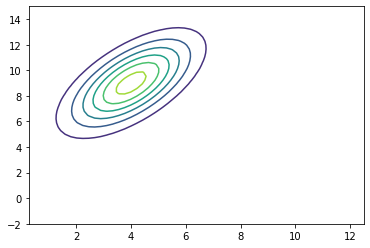

In [31]:
#Let's actually plot it in 2D now :
fig_4B = plt.figure()
ax_4B  = fig_4B.add_subplot(111)
ax_4B.contour(grid1, grid2, multi_normal1.pdf(grid)) 

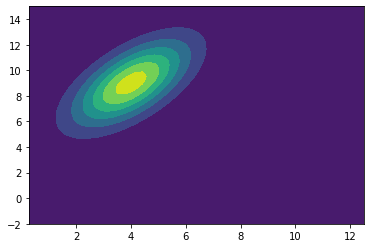

In [32]:
#I used the above figure to check these are indeed ellipses. But contourf gives a better plot :
plt.figure().add_subplot(111).contourf(grid1, grid2, multi_normal1.pdf(grid)) 
plt.show()

As expected, we get ellipses centered around the mean m1 = [4,9] and the ellipse itself is shaped in "diagonal", relatively to the covariance, we already computed its orientation before. Nothing particularly surprising, but it's still nice to see it. I will now also print it in 3D for fun :

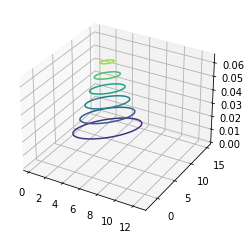

In [33]:
#3D printing :
ax_4C  = plt.axes(projection='3d')
ax_4C.contour3D(grid1, grid2, multi_normal1.pdf(grid)) 

In [34]:
#And the 3D general surface plot as well
ax_4C.plot_surface(grid1, grid2, multi_normal1.pdf(grid))
plt.show()

We clearly see the ellipses going higher and higher as values (X,Y) get closer to the center of it (that is, the mean). The shape of the ellipses depend of course on the covariance, and the global shape looks like a 3D gaussian, as expected.

<h4><strong>4.D </strong> Autres classes - Affichages 2D et 3D des équidensités </h4>

In [35]:
m2flat = [8.5,7.5] #For some reason the scipy multivariate function doesn't work with an ndarray
multi_normal2 = multivariate_normal(m2flat, s2)
dens2 = multi_normal2.pdf(grid)

m3flat = [6,3.5] #For some reason the scipy multivariate function doesn't work with an ndarray
multi_normal3 = multivariate_normal(m3flat, s3)
dens3 = multi_normal3.pdf(grid)

Text(0.5, 1.0, 'equidensities distrib 3')

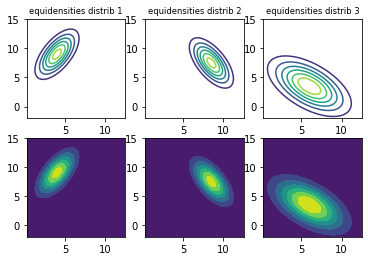

In [36]:
fig_4D, ax_4Di = plt.subplots(2,3)
ax_4Di[0,0].contour(grid1,grid2,multi_normal1.pdf(grid))
ax_4Di[0,1].contour(grid1,grid2,multi_normal2.pdf(grid))
ax_4Di[0,2].contour(grid1,grid2,multi_normal3.pdf(grid))
ax_4Di[1,0].contourf(grid1,grid2,multi_normal1.pdf(grid))
ax_4Di[1,1].contourf(grid1,grid2,multi_normal2.pdf(grid))
ax_4Di[1,2].contourf(grid1,grid2,multi_normal3.pdf(grid))

ax_4Di[0,0].set_title('equidensities distrib 1', fontsize = 'small')
ax_4Di[0,1].set_title('equidensities distrib 2', fontsize = 'small')
ax_4Di[0,2].set_title('equidensities distrib 3', fontsize = 'small')

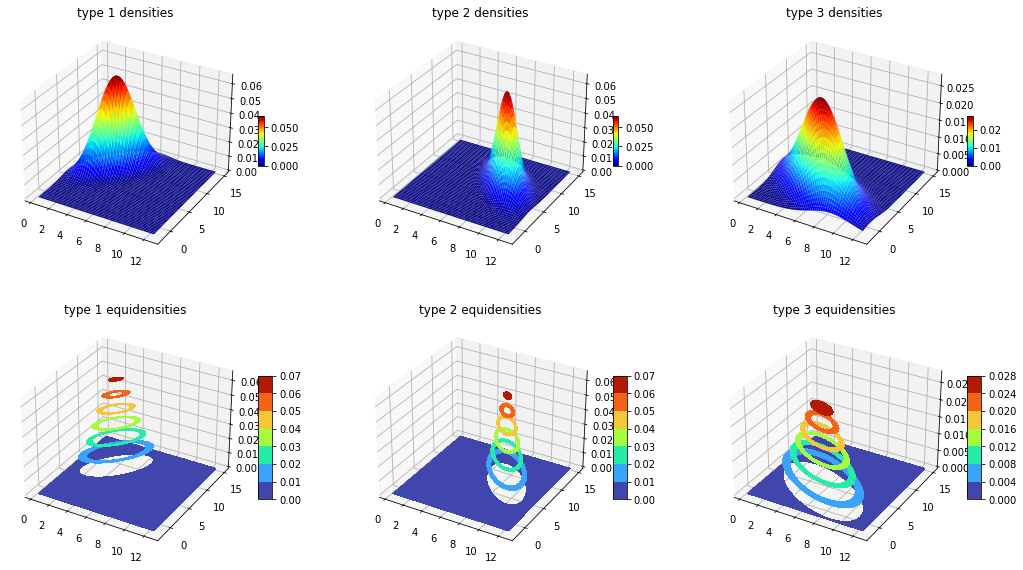

In [37]:
#3D printing on the same figure (not the same plot, obviously, we wouldn't understand anything) :
fig_4Dj  = plt.figure()
ax_4Dj   = fig_4Dj.add_subplot(2,3,1, projection = '3d')
surf     = ax_4Dj.plot_surface(grid1, grid2, multi_normal1.pdf(grid), rstride=1, cstride=1, cmap=cm.jet)
ax_4Dj.set_title('type 1 densities')
fig_4Dj.colorbar(surf, shrink = 0.2, aspect = 9)
ax_4Dj   = fig_4Dj.add_subplot(2,3,2, projection = '3d')
surf     = ax_4Dj.plot_surface(grid1, grid2, multi_normal2.pdf(grid), rstride=1, cstride=1, cmap=cm.jet)
ax_4Dj.set_title('type 2 densities')
fig_4Dj.colorbar(surf, shrink = 0.2, aspect = 9)
ax_4Dj   = fig_4Dj.add_subplot(2,3,3, projection = '3d')
surf     = ax_4Dj.plot_surface(grid1, grid2, multi_normal3.pdf(grid), rstride=1, cstride=1, cmap=cm.jet)
ax_4Dj.set_title('type 3 densities')
fig_4Dj.colorbar(surf, shrink = 0.2, aspect = 9)
ax_4Dj   = fig_4Dj.add_subplot(2,3,4, projection = '3d')
surf     = ax_4Dj.contourf(grid1, grid2, multi_normal1.pdf(grid), cmap=cm.turbo)
ax_4Dj.set_title('type 1 equidensities')
fig_4Dj.colorbar(surf, shrink = 0.5, aspect = 9)
ax_4Dj   = fig_4Dj.add_subplot(2,3,5, projection = '3d')
surf     = ax_4Dj.contourf(grid1, grid2, multi_normal2.pdf(grid), cmap=cm.turbo)
ax_4Dj.set_title('type 2 equidensities')
fig_4Dj.colorbar(surf, shrink = 0.5, aspect = 9)
ax_4Dj   = fig_4Dj.add_subplot(2,3,6, projection = '3d')
surf     = ax_4Dj.contourf(grid1, grid2, multi_normal3.pdf(grid), cmap=cm.turbo)
ax_4Dj.set_title('type 3 equidensities')
fig_4Dj.colorbar(surf, shrink = 0.5, aspect = 9)


fig_4Dj.set_figheight(10)
fig_4Dj.set_figwidth(18)

As we can see on this absolutely amazing figure with 6 3D subplots - and the above 2D version as well the maximal amplitude of density distributions are again in ellipse shape. But the difference is their span, their "area" (l'aire de l'ellipse la plus haute, en rouge foncé). This only translates (for higher covariance variables) visually that higher covariance means that even if more numbers have a higher probability to be reached, there are also more mean-like numbers that will get reached more often. 
</br> As a result (and this is clearly seen on the very last plot) the probability of the central ellipse falls off compared to the other ones (of the same color), because the surface is bigger, so the probability falls. But the last equidensity "zone", even if bigger or smaller, remains an ellipse.

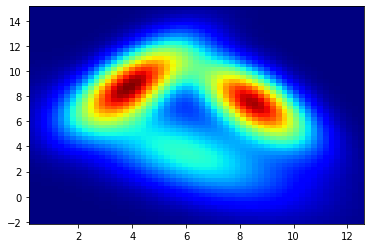

In [38]:
#Now, I will try plotting everything on one plot with the pcolormesh function :
figall = plt.figure()
axall  = figall.add_subplot(111)
axall.pcolormesh(grid1, grid2, multi_normal1.pdf(grid) + multi_normal2.pdf(grid) + multi_normal3.pdf(grid), shading = 'nearest', cmap = cm.jet)

<h2><strong>5. </strong> Visualisation des frontières </h2>

In [39]:
Z = np.zeros((57,57)) 
#This will be the array containing the labels associated to each dot (X(i),Y(j)) from the previous grids. 
#In order to classify all the dots, I will take (for each dot) the maximal value associated to a given density (1, 2 or 3), 
#and I'll fill out the corresponding value in Z. For now, Z is filled out with 1's (by default, we assume everything is from density 1, 
#and through comparisons we'll change the necessary values to put some 2's and 3's as well.

for i in range(57):
    for j in range(57):
        dens1ij, dens2ij, dens3ij = dens1[i][j], dens2[i][j], dens3[i][j]
        Ldensij = [dens1ij, dens2ij, dens3ij]
        if max(Ldensij) == dens1ij:
            Z[i][j]=1
        elif max(Ldensij) == dens2ij:
            Z[i][j]=2
        else:
            Z[i][j]=3
Z

array([[3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       ...,
       [3., 3., 3., ..., 1., 1., 1.],
       [3., 3., 3., ..., 1., 1., 1.],
       [3., 3., 3., ..., 1., 1., 1.]])

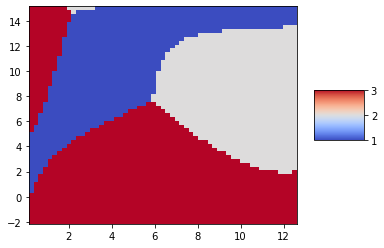

In [40]:
figZ = plt.figure()
axZ  = figZ.add_subplot(111)
zzx = axZ.pcolormesh(grid1, grid2, Z, shading = 'auto', cmap = cm.coolwarm)
figZ.colorbar(zzx, shrink = 1, aspect = 1)
plt.show()
#The following figure will show regions of 1, 2 and 3 with their respective colors. 

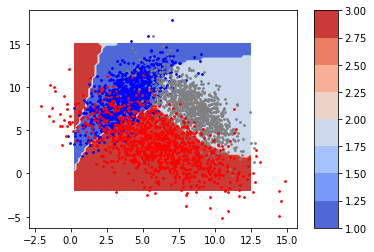

In [41]:
figZc = plt.figure()
axZc = figZc.add_subplot(111)
zzxc = axZc.contourf(grid1, grid2, Z, cmap = cm.coolwarm)
axZc.scatter(X1[0], X1[1], s = 3, c = 'blue', label = 'valeurs de X1')
axZc.scatter(X2[0], X2[1], s = 3, c = 'gray', label = 'valeurs de X2')
axZc.scatter(X3[0], X3[1], s = 3, c = 'red', label = 'valeurs de X3')
figZ.colorbar(zzxc, ax = axZc, shrink = 1, aspect = 9)
plt.show()
#Here is a "clearer" version, with more defined frontiers this time around and the scattered values to see where frontiers land

Most points end up in the right regions delimitated by the frontiers. The big covariance of the red dots is materialized by how large their scatter is, and it shows up in the frontiers. The gray points are more concentrated and thus their region is smaller, and the blue points are kind of in the middle range, they eat a lot of the gray above, a little of the red dots (because they're so scattered), but get eaten on the left by the red ones (again, because they're so scattered they "go everywhere"). 
</br> Now I'll focus specifically on the frontiers :

As we can see, the expected regions of 1 2 and 3 are all here, with a big blue region for the 1 distribution, same for 2, and a bigger one below (as it covers a bigger part, bigger covariance, even if some of its top-left and top-right parts were eaten by the others). 
</br> A surprise on the red patch in the top-left, this one is here because of the high covariance of the red one.
</br> The same can be said on the blue patch on the top-right, the one that looks like a leak towards the right side. 

The frontiers seem well-placed, as all the color dots are in their respective regions. To focus on specific frontiers now, the red-gray one is the best one, delimitating clearly both regions of dots. The blue-gray is a very good as well, only a few gray dots bypass the frontier but that's still ok (distributions overlap a little so there's a balance between closeness to the mean and overall covariance). The blue-red is the most unclear one. A lot of blue dots and red dots are on the wrong side of the frontier, and there's this huge red patch on the left. But math doesn't lie and the numbers are here, we can see it all still makes sense. 

<h2><strong>6. </strong> Application </h2>

For this last question I won't comment a lot, I'll basically start by opening and reading data, then I'll apply almost literally the same things I did before and print results. I'll comment in the end.

In [42]:
#Data loading
wgt1, wgt2, wgt3, mpg1, mpg2, mpg3 = [],[],[],[],[],[]
with open("voitures_t.txt", "r") as filestream:
    for line in filestream:
        currentline = line.split(",")
        mpg, wgt, zon = float(currentline[0]), float(currentline[4]), float(currentline[7])
        if zon == 1:
            wgt1.append(wgt)
            mpg1.append(mpg)
        elif zon == 2:
            wgt2.append(wgt)
            mpg2.append(mpg)
        else:
            wgt3.append(wgt)
            mpg3.append(mpg)
c1, c2, c3 = np.array([wgt1, mpg1]), np.array([wgt2, mpg2]), np.array([wgt3, mpg3])

In [43]:
wgt1[25]

3329.0

In [44]:
mpg3[40]

21.1

In [45]:
c2[0][15]

2265.0

In [46]:
#means
mc1, mc2, mc3 = [np.mean(c1[0]), np.mean(c1[1])], [np.mean(c2[0]), np.mean(c2[1])], [np.mean(c3[0]), np.mean(c3[1])]
mc1 #Below is mean 1, that is the 2-D mean of the first class of cars (zone 1)

[3372.4897959183672, 20.0334693877551]

In [47]:
mc2 #Below is mean 2, that is the 2-D mean of the second class of cars (zone 2)

[2433.470588235294, 27.602941176470587]

In [48]:
mc3 #Below is mean 3, that is the 2-D mean of the third class of cars (zone 3)

[2221.227848101266, 30.450632911392404]

Maybe a few comments on these values : </br>
In zone 1, cars consume a lot but they don't weigh that much </br>
In zone 3, cars consume little but they weigh much more </br>
Zone 2 stands somewhere in the middle

In [49]:
#covariances
covc1, covc2, covc3 = np.cov(c1), np.cov(c2), np.cov(c3)

In [50]:
covc1

array([[ 6.32576357e+05, -4.33566974e+03],
       [-4.33566974e+03,  4.14785473e+01]])

In [51]:
covc2

array([[ 2.41880880e+05, -1.65698349e+03],
       [-1.65698349e+03,  4.32987972e+01]])

In [52]:
covc3

array([[ 1.02718486e+05, -1.10104758e+03],
       [-1.10104758e+03,  3.70886855e+01]])

It is already much harder to inderpret those values. At least all cells are of the same sign for each zone.

In [53]:
#Frontier draw
#To draw frontiers, I'll interpret the distribution of cars as gaussians, as no model has been proposed in the subject. 
#We have a mean and a covariance, and the code for it...

abscc, ordoc = np.linspace(5, 50, 80), np.linspace(1500, 5000, 80)
grid2c, grid1c = np.meshgrid(abscc, ordoc)
gridc = np.dstack((grid1c,grid2c))

multi_normal1c = multivariate_normal(mc1, covc1)
dens1c = multi_normal1c.pdf(gridc)
multi_normal2c = multivariate_normal(mc2, covc2)
dens2c = multi_normal2c.pdf(gridc)
multi_normal3c = multivariate_normal(mc3, covc3)
dens3c = multi_normal3c.pdf(gridc)

In [54]:
Zc = np.zeros((80,80)) 

for i in range(80):
    for j in range(80):
        dens1ijc, dens2ijc, dens3ijc = dens1c[i][j], dens2c[i][j], dens3c[i][j]
        Ldensijc = [dens1ijc, dens2ijc, dens3ijc]
        if max(Ldensijc) == dens1ijc:
            Zc[i][j]=1
        elif max(Ldensijc) == dens2ijc:
            Zc[i][j]=2
        else:
            Zc[i][j]=3
Zc

array([[2., 2., 2., ..., 3., 3., 3.],
       [2., 2., 2., ..., 3., 3., 3.],
       [2., 2., 2., ..., 3., 3., 3.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]])

Text(0.5, 1.0, 'equidensities distrib 3')

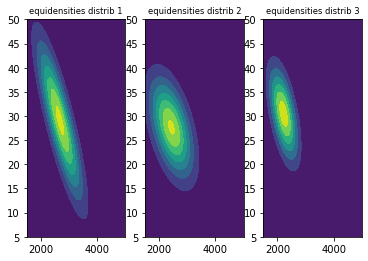

In [55]:
fig_4Dc, ax_4Dic = plt.subplots(1,3)
ax_4Dic[0].contourf(grid1c,grid2c,np.transpose(dens1c))
ax_4Dic[1].contourf(grid1c,grid2c,dens2c)
ax_4Dic[2].contourf(grid1c,grid2c,dens3c)

ax_4Dic[0].set_title('equidensities distrib 1', fontsize = 'small')
ax_4Dic[1].set_title('equidensities distrib 2', fontsize = 'small')
ax_4Dic[2].set_title('equidensities distrib 3', fontsize = 'small')

figZcc = plt.figure()
axZcc = figZcc.add_subplot(111)
zzxcc = axZcc.contourf(grid1c, grid2c, Zc, cmap = cm.coolwarm)
figZc.colorbar(zzxcc, ax = axZcc, shrink = 1, aspect = 9)
plt.show()
#Here is a "clearer" version, with more defined frontiers this time around and the scattered values to see where frontiers land

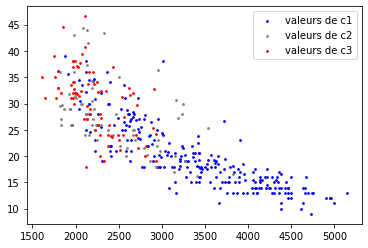

In [56]:
plt.scatter(c1[0], c1[1], s = 3, c = 'blue', label = 'valeurs de c1')
plt.scatter(c2[0], c2[1], s = 3, c = 'gray', label = 'valeurs de c2')
plt.scatter(c3[0], c3[1], s = 3, c = 'red', label = 'valeurs de c3')
plt.legend()
plt.show()

As we can see on the previous graphs, the gaussian multivariate model works well and it agrees with the last scatter plot of our data. Let's now plot frontiers on a single graph. The blue dots will be very identificable, but for the red and gray, as we can see on the equidensity plots and the scatter plot, things will get harder. Let's see :

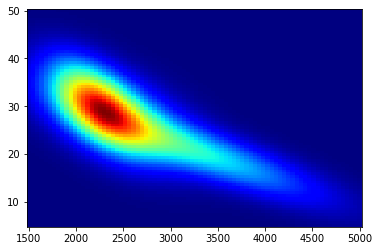

In [57]:
figallc = plt.figure()
axallc  = figallc.add_subplot(111)
axallc.pcolormesh(grid1c, grid2c, dens1c + dens2c + dens3c, shading = 'nearest', cmap = cm.jet)

As expected, there is a center of mass for cars around the c2 and c3 means, with a long tail associated to c1. Things will be hard to distinguish with frontiers, but we can try.

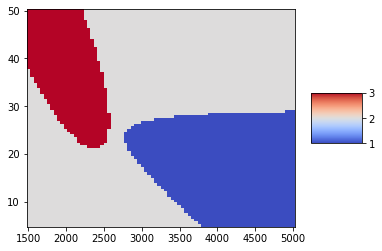

In [58]:
figZa = plt.figure()
axZa  = figZa.add_subplot(111)
zzxa = axZa.pcolormesh(grid1c, grid2c, Zc, shading = 'auto', cmap = cm.coolwarm)
figZa.colorbar(zzxa, shrink = 1, aspect = 1)
plt.show()
#The following figure will show regions of 1, 2 and 3 with their respective colors. 

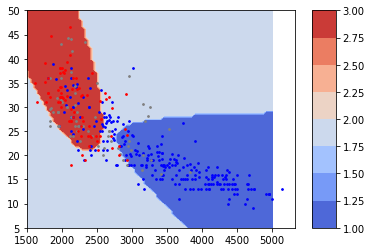

In [59]:
figZca = plt.figure()
axZca = figZca.add_subplot(111)
zzxca = axZca.contourf(grid1c, grid2c, Zc, cmap = cm.coolwarm)
axZca.scatter(c1[0], c1[1], s = 3, c = 'blue', label = 'valeurs de X1')
axZca.scatter(c2[0], c2[1], s = 3, c = 'gray', label = 'valeurs de X2')
axZca.scatter(c3[0], c3[1], s = 3, c = 'red', label = 'valeurs de X3')
figZca.colorbar(zzxca, ax = axZca, shrink = 1, aspect = 9)
plt.show()
#Here is a "clearer" version, with more defined frontiers this time around and the scattered values to see where frontiers land

I am a bit surprised to see everything turned out quite nicely in the end ! </br>
Zone 1 is the long tail on the bottom-right taking most blue dots with him (although we can't blame frontiers to set aside some of them that are too deep scattered between gray and red dots), and it looks like a good prediction zone, as few dots from other colors are in this blue zone. </br>
Zone 3 is the red patch on the top-left. I agree it's better than expected as most gray dots are also in the area, but math doesn't lie and the concentration in red dots is higher there and again, it seems to be working as few red dots end up on the side. Again we can't blame the frontiers to be like that, with this massive multi-zone cluster in the middle I am happy with the result. </br>
Now let's talk about zone 2. Gray dots cars are scattered everywhere which makes computing values complicated. Basically their covariance is so high the rest of the plot is entirely zone 2. Which means that if a car data follows some kind of pattern, it's likely to end up in zone 1 or 3. But if it doesn't, then it ends up in the category 2. The concentration of gray dots isn't high anywhere in this zone, it's just that there's less of the rest.  </br>
In the end I am satisfied with the regions I found, they all seem to represent and be associated to their respective car points. 

In [60]:
#Author : Guillaume CAPITAN 24/02/2022